In [2]:
import requests

# Define the API URL and key
api_key = "874ded9d"  
api_url = "http://www.omdbapi.com/"

# Get movie title from user input
movie_title = input("Enter movie title: ")

# Define the parameters for the search API request
params = {
    "apikey": api_key,
    "t": movie_title  # Use the user-provided title for search
}

# Make the search API request
response = requests.get(api_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse JSON data from response
    print(data)
else:
    print("Error:", response.status_code)


Enter movie title:  spider man


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [13]:
import requests

# Define the API URL and key
api_key = "874ded9d"  # Replace with your actual OMDB API key
api_url = "http://www.omdbapi.com/"

# Get movie title from user input
movie_title = input("Enter movie title: ")

# Define the parameters for the search API request
params = {
    "apikey": api_key,
    "s": movie_title  # Use the user-provided title for search
}

# Make the search API request
response = requests.get(api_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()  # Parse JSON data from response
    print(data)
else:
    print("Error:", response.status_code)


import requests

if data.get("Response") == "True":  # Check if the search was successful
    movies = data.get("Search", [])  # Get the list of movies

    if movies:
        print(f"Found {len(movies)} movie(s) with the title '{movie_title}':")
        for movie in movies:
            print("\nTitle:", movie.get("Title"))
            print("Year:", movie.get("Year"))
            print("Type:", movie.get("Type"))
            print("Poster URL:", movie.get("Poster"))
            
            # Fetch detailed information for each movie
            movie_id = movie.get("imdbID")
            movie_params = {
                "apikey": api_key,
                "i": movie_id
            }
            movie_response = requests.get(api_url, params=movie_params)
            
            if movie_response.status_code == 200:
                movie_data = movie_response.json()
                
                # Fetch genre from the detailed movie info
                genre = movie_data.get("Genre", 'N/A')  # Default to 'N/A' if genre is not found
                print("Genre:", genre)
                
                # Fetch IMDb rating
                imdb_rating = 'N/A'  # Default value if IMDb rating is not found
                for rating in movie_data.get("Ratings", []):
                    if rating.get('Source') == 'Internet Movie Database':
                        imdb_rating = rating.get('Value', 'N/A')
                        break
                
                print("IMDb Rating:", imdb_rating)
            else:
                print(f"Error fetching detailed movie info: {movie_response.status_code}")
    else:
        print(f"No movies found with the title '{movie_title}'.")
else:
    print(f"Error: {data.get('Error')}")


Enter movie title:  spider man


{'Search': [{'Title': 'Spider-Man: No Way Home', 'Year': '2021', 'imdbID': 'tt10872600', 'Type': 'movie', 'Poster': 'https://m.media-amazon.com/images/M/MV5BZjI5NmFmOWUtZWY0ZS00NTc5LWE0YjgtMjk3YmNiM2EwM2U4XkEyXkFqcGdeQXVyMTA1NjE5MTAz._V1_SX300.jpg'}, {'Title': 'Spider-Man', 'Year': '2002', 'imdbID': 'tt0145487', 'Type': 'movie', 'Poster': 'https://m.media-amazon.com/images/M/MV5BZDEyN2NhMjgtMjdhNi00MmNlLWE5YTgtZGE4MzNjMTRlMGEwXkEyXkFqcGdeQXVyNDUyOTg3Njg@._V1_SX300.jpg'}, {'Title': 'Spider-Man: Homecoming', 'Year': '2017', 'imdbID': 'tt2250912', 'Type': 'movie', 'Poster': 'https://m.media-amazon.com/images/M/MV5BODY2MTAzOTQ4M15BMl5BanBnXkFtZTgwNzg5MTE0MjI@._V1_SX300.jpg'}, {'Title': 'Spider-Man 2', 'Year': '2004', 'imdbID': 'tt0316654', 'Type': 'movie', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMzY2ODk4NmUtOTVmNi00ZTdkLTlmOWYtMmE2OWVhNTU2OTVkXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg'}, {'Title': 'The Amazing Spider-Man', 'Year': '2012', 'imdbID': 'tt0948470', 'Type': 'movie', 

In [14]:
# # filtering by genre  of movie.
import requests

desired_genre = input("Define the genre you want to filter by")  # Define the genre you want to filter by

if data.get("Response") == "True":  # Check if the search was successful
    movies = data.get("Search", [])  # Get the list of movies

    if movies:
        print(f"Found {len(movies)} movie(s) with the title '{movie_title}':")
        for movie in movies:
            # Fetch detailed information for each movie
            movie_id = movie.get("imdbID")
            movie_params = {
                "apikey": api_key,
                "i": movie_id
            }
            movie_response = requests.get(api_url, params=movie_params)
            
            if movie_response.status_code == 200:
                movie_data = movie_response.json()
                
                # Fetch genre from the detailed movie info
                genre = movie_data.get("Genre", 'N/A')  # Default to 'N/A' if genre is not found
                
                # Filter by desired genre
                if desired_genre in genre:
                    print("\nTitle:", movie.get("Title"))
                    print("Year:", movie.get("Year"))
                    print("Type:", movie.get("Type"))
                    print("Poster URL:", movie.get("Poster"))
                    print("Genre:", genre)
                    
                    # Fetch IMDb rating
                    imdb_rating = 'N/A'  # Default value if IMDb rating is not found
                    for rating in movie_data.get("Ratings", []):
                        if rating.get('Source') == 'Internet Movie Database':
                            imdb_rating = rating.get('Value', 'N/A')
                            break
                    
                    print("IMDb Rating:", imdb_rating)
                else:
                    # Skip printing if genre does not match
                    continue
            else:
                print(f"Error fetching detailed movie info: {movie_response.status_code}")
    else:
        print(f"No movies found with the title '{movie_title}'.")
else:
    print(f"Error: {data.get('Error')}")


Define the genre you want to filter by Action


Found 10 movie(s) with the title 'spider man':

Title: Spider-Man: No Way Home
Year: 2021
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BZjI5NmFmOWUtZWY0ZS00NTc5LWE0YjgtMjk3YmNiM2EwM2U4XkEyXkFqcGdeQXVyMTA1NjE5MTAz._V1_SX300.jpg
Genre: Action, Adventure, Fantasy
IMDb Rating: 8.2/10

Title: Spider-Man
Year: 2002
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BZDEyN2NhMjgtMjdhNi00MmNlLWE5YTgtZGE4MzNjMTRlMGEwXkEyXkFqcGdeQXVyNDUyOTg3Njg@._V1_SX300.jpg
Genre: Action, Adventure, Sci-Fi
IMDb Rating: 7.4/10

Title: Spider-Man: Homecoming
Year: 2017
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BODY2MTAzOTQ4M15BMl5BanBnXkFtZTgwNzg5MTE0MjI@._V1_SX300.jpg
Genre: Action, Adventure, Sci-Fi
IMDb Rating: 7.4/10

Title: Spider-Man 2
Year: 2004
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BMzY2ODk4NmUtOTVmNi00ZTdkLTlmOWYtMmE2OWVhNTU2OTVkXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Genre: Action, Adventure, Sci-Fi
IMDb Rating: 7.5/10

Titl

In [15]:
# filtering by year of release 
user_year = input("Enter a year to filter movies: ")

# Convert user input to integer for comparison
user_year = int(user_year)

# Filter and print movies based on the user's year
for movie in movies:
    # Convert movie year to integer for comparison
    movie_year = int(movie["Year"])
    if movie_year == user_year:
        print("\nTitle:", movie.get("Title"))
        print("Year:", movie.get("Year"))
        print("Type:", movie.get("Type"))
        print("Poster URL:", movie.get("Poster"))

        movie_id = movie.get("imdbID")
        movie_params = {
            "apikey": api_key,
            "i": movie_id
        }
        movie_response = requests.get(api_url, params=movie_params)
            
        if movie_response.status_code == 200:
            movie_data = movie_response.json()
                
            # Fetch genre from the detailed movie info
            genre = movie_data.get("Genre", 'N/A')  # Default to 'N/A' if genre is not found
            print("Genre:", genre)
            
            imdb_rating = 'N/A'  # Default value if IMDb rating is not found
            for rating in movie_data.get("Ratings", []):
                if rating.get('Source') == 'Internet Movie Database':
                    imdb_rating = rating.get('Value', 'N/A')
                    break

            print("IMDb Rating:", imdb_rating)
        else:
            print("Error fetching movie details.")


Enter a year to filter movies:  2018



Title: Spider-Man: Into the Spider-Verse
Year: 2018
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BMjMwNDkxMTgzOF5BMl5BanBnXkFtZTgwNTkwNTQ3NjM@._V1_SX300.jpg
Genre: Animation, Action, Adventure
IMDb Rating: 8.4/10


In [17]:
# filtering by IMDBs rating
import requests

min_rating = float(input("Define the minimum rating you want to filter by :- ")) 

if data.get("Response") == "True":  # Check if the search was successful
    movies = data.get("Search", [])  # Get the list of movies

    if movies:
        print(f"movie(s) with the title '{movie_title}':")
        for movie in movies:
            # Fetch detailed information for each movie
            movie_id = movie.get("imdbID")
            movie_params = {
                "apikey": api_key,
                "i": movie_id
            }
            movie_response = requests.get(api_url, params=movie_params)
            
            if movie_response.status_code == 200:
                movie_data = movie_response.json()
                
                # Fetch IMDb rating
                imdb_rating = 'N/A'  # Default value if IMDb rating is not found
                for rating in movie_data.get("Ratings", []):
                    if rating.get('Source') == 'Internet Movie Database':
                        imdb_rating = rating.get('Value', 'N/A')
                        break
                
                # Extract rating value for comparison
                imdb_rating_float = float(imdb_rating.split('/')[0])
                
                # Filter by rating
                if imdb_rating_float >= min_rating:
                    print("\nTitle:", movie.get("Title"))
                    print("Year:", movie.get("Year"))
                    print("Type:", movie.get("Type"))
                    print("Poster URL:", movie.get("Poster"))
                    print("IMDb Rating:", imdb_rating)
            
    else:
        print(f"No movies found with the title '{movie_title}'.")
else:
    print(f"Error: {data.get('Error')}")


Define the minimum rating you want to filter by :-  3.0


movie(s) with the title 'spider man':

Title: Spider-Man: No Way Home
Year: 2021
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BZjI5NmFmOWUtZWY0ZS00NTc5LWE0YjgtMjk3YmNiM2EwM2U4XkEyXkFqcGdeQXVyMTA1NjE5MTAz._V1_SX300.jpg
IMDb Rating: 8.2/10

Title: Spider-Man
Year: 2002
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BZDEyN2NhMjgtMjdhNi00MmNlLWE5YTgtZGE4MzNjMTRlMGEwXkEyXkFqcGdeQXVyNDUyOTg3Njg@._V1_SX300.jpg
IMDb Rating: 7.4/10

Title: Spider-Man: Homecoming
Year: 2017
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BODY2MTAzOTQ4M15BMl5BanBnXkFtZTgwNzg5MTE0MjI@._V1_SX300.jpg
IMDb Rating: 7.4/10

Title: Spider-Man 2
Year: 2004
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BMzY2ODk4NmUtOTVmNi00ZTdkLTlmOWYtMmE2OWVhNTU2OTVkXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
IMDb Rating: 7.5/10

Title: The Amazing Spider-Man
Year: 2012
Type: movie
Poster URL: https://m.media-amazon.com/images/M/MV5BMjMyOTM4MDMxNV5BMl5BanBnXkFtZTcwNjIyNzExO

Enter the movie name:  spider man


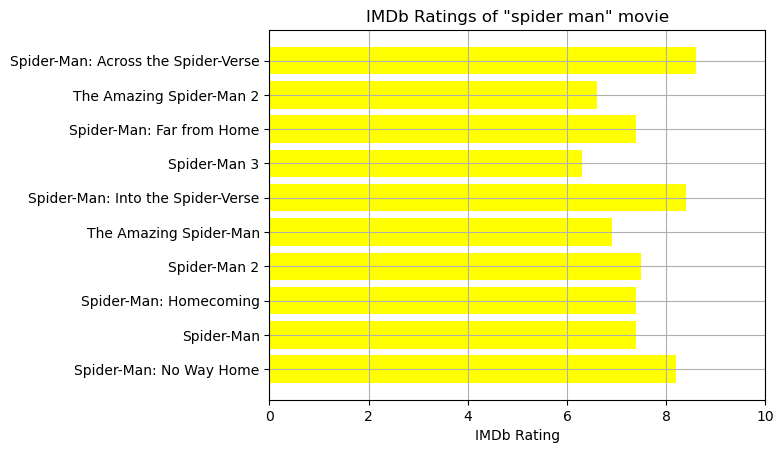

In [18]:
# ploting graph (chart) for each lists of movie 

import requests
import matplotlib.pyplot as plt

# User input for the movie title
movie_title = input("Enter the movie name: ")

# Your OMDb API key (replace with your actual API key)
api_key = "874ded9d"
api_url = "http://www.omdbapi.com/"

# Request parameters for the movie search
params = {
    "apikey": api_key,
    "s": movie_title  # 's' is for searching by movie title
}

# Sending the request to OMDb API
response = requests.get(api_url, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()  # Parse the JSON response
    
    # Check if the API found movies for the search query
    if data.get("Response") == "True":
        movies = data.get("Search", [])  # Get the list of movies
        
        titles = []  # List to store movie titles
        ratings = []  # List to store IMDb ratings

        # Loop through each movie and get its detailed information
        for movie in movies:
            movie_id = movie.get("imdbID")  # Get the IMDb ID of the movie
            movie_params = {
                "apikey": api_key,
                "i": movie_id  # 'i' is for searching by IMDb ID
            }
            movie_response = requests.get(api_url, params=movie_params)  # Fetch movie details
            
            # Check if the detailed request was successful
            if movie_response.status_code == 200:
                movie_data = movie_response.json()  # Parse the detailed movie data
                imdb_rating = movie_data.get("imdbRating", "N/A")  # Get IMDb rating
                
                # If IMDb rating is available, add title and rating to the lists
                if imdb_rating != "N/A":
                    titles.append(movie.get("Title"))  # Add movie title
                    ratings.append(float(imdb_rating))  # Add IMDb rating as a float
        
        # If any movies have ratings, plot them
        if titles and ratings:
            # Create a horizontal bar chart
            plt.barh(titles, ratings, color='yellow')
            plt.xlabel('IMDb Rating')  # Label for the X-axis
            plt.title(f'IMDb Ratings of "{movie_title}" movie')  # Chart title
            plt.xlim(0, 10)# IMDb ratings range from 0 to 10
            plt.grid(True)
            plt.show()  # Display the chart
        else:
            print(f"No IMDb ratings available for movies with the title '{movie_title}'.")
    
    else:
        print(f"Error: {data.get('Error')}")  # Print the error from OMDb API
else:
    print(f"Error fetching movie data: {response.status_code}")  # Print the HTTP status code error


In [10]:
# Store movie information in a local database

import requests
import csv

API_KEY = '874ded9d'
movie_title = input("Enter movie name: ")
api_url = "http://www.omdbapi.com/"

# Fetch search results
search_response = requests.get(api_url, params={"apikey": API_KEY, "s": movie_title})
search_data = search_response.json()

if search_data.get('Response') == 'True':
    # Extract movie IDs from search results
    movies = search_data.get('Search', [])
    
    # Specify CSV fields
    fields = ['Title', 'Year', 'Director', 'Actors', 'Genre', 'imdbRating','imdbID']
    
    with open("C:/Users/ezepayooner/OneDrive/the_avengers5.csv", 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=fields)
        writer.writeheader()
        
        for movie in movies:
            # Fetch detailed movie data
            movie_detail_response = requests.get(api_url, params={"apikey": API_KEY, "i": movie['imdbID']})
            movie_detail = movie_detail_response.json()
            
            # Write data to CSV
            writer.writerow({
                'Title': movie_detail.get('Title', 'N/A'),
                'Year': movie_detail.get('Year', 'N/A'),
                'Director': movie_detail.get('Director', 'N/A'),
                'Actors': movie_detail.get('Actors', 'N/A'),
                'Genre': movie_detail.get('Genre', 'N/A'),
                'imdbRating': movie_detail.get('imdbRating', 'N/A'),
                'imdbID': movie_detail.get('imdbID', 'N/A'),
            })

    print("Movies data saved successfully!")
else:
    print(f"Movie not found: {search_data.get('Error', 'Unknown error')}")


Enter movie name:  the avengers


Movies data saved successfully!


In [11]:
import pandas as pd
x=open("C:/Users/ezepayooner/OneDrive/the_avengers5.csv","r")
print(pd.DataFrame(x))

                                                    0
0   Title,Year,Director,Actors,Genre,imdbRating,im...
1   The Avengers,2012,Joss Whedon,"Robert Downey J...
2   The Avengers,1998,Jeremiah S. Chechik,"Ralph F...
3   The Avengers: Earth's Mightiest Heroes,2010–20...
4   Ultimate Avengers: The Movie,2006,"Curt Geda, ...
5   The Avengers,1961–1969,N/A,"Patrick Macnee, Di...
6   The New Avengers,1976–1977,N/A,"Patrick Macnee...
7   The Avengers: United They Stand,1999–2000,N/A,...
8   Avengers: Infinity War IMAX® Behind the Frame,...
9   The Avengers,1942,Harold French,"Hugh Williams...
10  Marvel Disk Wars: The Avengers,2014–2015,N/A,"...
